In [27]:
import numpy as np
import pandas as pd

In [64]:
#Número de jogadores
num_samples = 10000

#Máximo e mínimo para cada jogada
maximo = 100
minimo = 0

#Distribuição da regra de decisão de cada jogador
#(recusa se o a oferta for menor que a regra)
m_decisao = 30
d_decisao = 5

#Distribuição das jogadas
m_jogo = 40
d_jogo = 7


#Jogador racional
jogada_racional = 1
decisão_racional = 1

#Inicializa dataframe
df = pd.DataFrame()

#Número de rodadas
nrodadas =50

In [65]:
# Cria coluna de decisao com o jogador racional em primeiro lugar
df['decisao'] = np.clip(np.random.normal(m_decisao, d_decisao, num_samples), minimo,maximo).astype(int)
df.at[0, 'decisao'] = decisão_racional  # Definir o primeiro item como 0.1

for i in range(nrodadas):

    #cria a coluna com a jogada dessa rodada
    coluna_joga = f'rodada-{i:03d}'
    df[coluna_joga] = np.clip(np.random.normal(m_jogo, d_jogo, num_samples), minimo,maximo).astype(int)

    # Adiciona jogador racional
    idx_joga = np.random.randint(0, num_samples)
    df.at[idx_joga, coluna_joga] = jogada_racional

# Criar a coluna 'total' somando apenas valores maiores que 'decisao'
colunas_rodada = [col for col in df.columns if col.startswith("rodada")]
df['total'] = df[colunas_rodada].apply(lambda row: row[row > df.loc[row.name, 'decisao']].sum(), axis=1)/nrodadas

In [76]:
df

,decisao,rodada-000,rodada-001,rodada-002,rodada-003,rodada-004,rodada-005,rodada-006,rodada-007,rodada-008,...,rodada-041,rodada-042,rodada-043,rodada-044,rodada-045,rodada-046,rodada-047,rodada-048,rodada-049,total
0,1,38,33,37,31,37,33,43,34,40,...,36,40,44,28,37,46,44,38,33,37.88
1,26,36,39,27,27,47,34,29,41,40,...,54,48,48,30,26,39,49,36,36,37.18
2,30,42,33,52,40,35,34,48,44,35,...,35,47,43,41,36,35,43,45,43,37.50
3,33,47,32,36,49,49,50,27,33,47,...,35,39,30,50,35,53,48,40,29,31.20
4,30,37,31,47,42,40,49,46,31,48,...,47,40,47,33,41,24,27,37,48,37.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36,41,36,39,28,37,27,34,44,46,...,36,38,38,27,42,35,39,33,30,27.16
9996,27,48,34,32,37,39,33,47,39,45,...,42,35,37,50,22,39,40,39,31,38.34
9997,31,34,46,41,44,46,36,47,39,44,...,43,46,36,40,39,36,33,36,45,36.80
9998,41,42,44,33,38,42,40,47,42,39,...,50,42,31,48,32,35,44,38,40,18.34


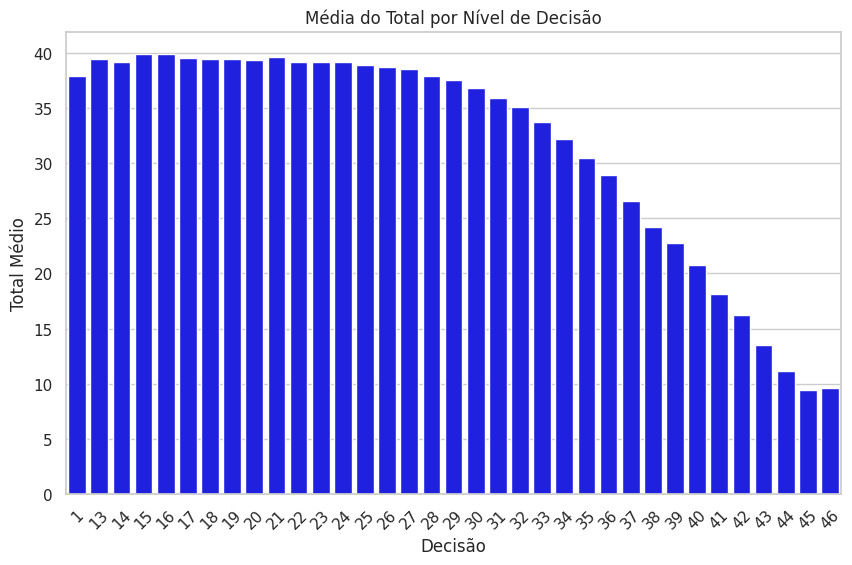

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

dfa = df[['decisao','total']].groupby('decisao').mean()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=dfa.index, y=dfa['total'], color="blue")

plt.xlabel("Decisão")
plt.ylabel("Total Médio")
plt.title("Média do Total por Nível de Decisão")
plt.xticks(rotation=45)
plt.show()